In [1]:
import pandas as pd, numpy as np, seaborn as sbn, matplotlib.pyplot as plt

from Modules import utils as utl
from Modules import data_exploration as de
from Modules import machine_learning as ml
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import metrics
import pickle

In [2]:
csv_file_path = 'Data/finalists_cleaned.csv'
eurovision_df = pd.read_csv(csv_file_path, encoding='windows-1252')

In [3]:
eurovision_df

,year,final_draw_position,country,style,final_televote_points,final_jury_points,final_televote_votes,final_jury_votes,final_place,final_total_points
0,2023,20,Norway,Pop,216.0,52.0,36.0,11.0,5.0,268.0
1,2023,5,Serbia,Pop,16.0,14.0,4.0,6.0,24.0,30.0
2,2023,2,Portugal,Pop,16.0,43.0,3.0,9.0,23.0,59.0
3,2023,25,Croatia,Pop,112.0,11.0,20.0,2.0,13.0,123.0
4,2023,3,Switzerland,Ballad,31.0,61.0,10.0,15.0,20.0,92.0
...,...,...,...,...,...,...,...,...,...,...
353,2009,3,France,Ballad,54.0,164.0,NaN,NaN,8.0,218.0
354,2009,10,Russia,Ballad,118.0,67.0,NaN,NaN,11.0,185.0
355,2009,17,Germany,Pop,18.0,73.0,NaN,NaN,20.0,91.0
356,2009,23,United Kingdom,Ballad,105.0,223.0,NaN,NaN,5.0,328.0


In [4]:
dropped_columns = ['style', 'final_televote_votes', 'final_jury_votes', 'country']
jury_televote = eurovision_df.drop(columns=dropped_columns)

In [5]:
jury_televote

,year,final_draw_position,final_televote_points,final_jury_points,final_place,final_total_points
0,2023,20,216.0,52.0,5.0,268.0
1,2023,5,16.0,14.0,24.0,30.0
2,2023,2,16.0,43.0,23.0,59.0
3,2023,25,112.0,11.0,13.0,123.0
4,2023,3,31.0,61.0,20.0,92.0
...,...,...,...,...,...,...
353,2009,3,54.0,164.0,8.0,218.0
354,2009,10,118.0,67.0,11.0,185.0
355,2009,17,18.0,73.0,20.0,91.0
356,2009,23,105.0,223.0,5.0,328.0


In [6]:
jury_televote.isnull().sum()

year                      0
final_draw_position       0
final_televote_points    32
final_jury_points        32
final_place               0
final_total_points        0
dtype: int64

In [7]:
# Show the rows with any null values in the jury_televote DataFrame
null_rows = jury_televote[jury_televote.isnull().any(axis=1)]

# Display the rows with null values
null_rows

,year,final_draw_position,final_televote_points,final_jury_points,final_place,final_total_points
212,2014,24,NaN,NaN,2.0,0.0
231,2013,7,NaN,NaN,20.0,0.0
232,2013,18,NaN,NaN,1.0,0.0
233,2013,10,NaN,NaN,5.0,0.0
234,2013,22,NaN,NaN,3.0,0.0
235,2013,13,NaN,NaN,9.0,0.0
236,2013,2,NaN,NaN,22.0,0.0
237,2013,8,NaN,NaN,16.0,0.0
238,2013,3,NaN,NaN,11.0,0.0
239,2013,26,NaN,NaN,26.0,0.0


In [8]:
# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
jury_televote_imputed = pd.DataFrame(imputer.fit_transform(jury_televote), columns=jury_televote.columns)

# Display the first few rows of the imputed DataFrame
jury_televote_imputed.head()


,year,final_draw_position,final_televote_points,final_jury_points,final_place,final_total_points
0,2023.0,20.0,216.0,52.0,5.0,268.0
1,2023.0,5.0,16.0,14.0,24.0,30.0
2,2023.0,2.0,16.0,43.0,23.0,59.0
3,2023.0,25.0,112.0,11.0,13.0,123.0
4,2023.0,3.0,31.0,61.0,20.0,92.0


In [9]:
jury_televote.head()

,year,final_draw_position,final_televote_points,final_jury_points,final_place,final_total_points
0,2023,20,216.0,52.0,5.0,268.0
1,2023,5,16.0,14.0,24.0,30.0
2,2023,2,16.0,43.0,23.0,59.0
3,2023,25,112.0,11.0,13.0,123.0
4,2023,3,31.0,61.0,20.0,92.0


In [10]:
# Print the column names of your DataFrame
print(jury_televote_imputed.columns)


Index(['year', 'final_draw_position', 'final_televote_points',
       'final_jury_points', 'final_place', 'final_total_points'],
      dtype='object')


In [11]:
# Check if there are any missing values in key columns (jury points and televote points)
print(jury_televote_imputed[['final_jury_points', 'final_televote_points', 'final_draw_position']].isnull().sum())


final_jury_points        0
final_televote_points    0
final_draw_position      0
dtype: int64


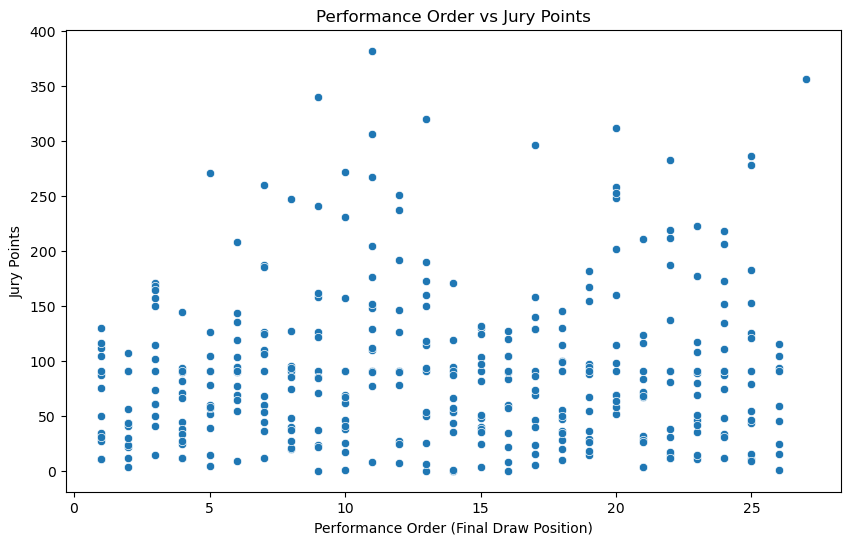

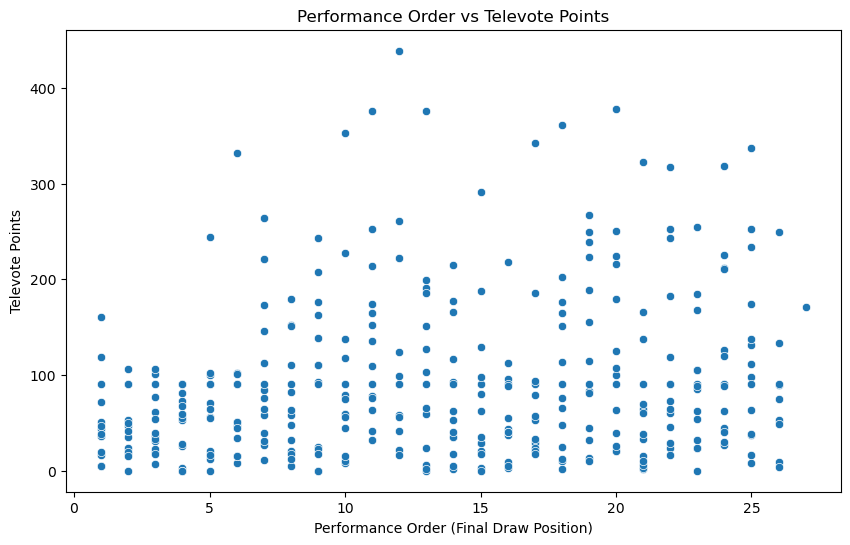

In [12]:
# Scatter plot of Performance Order vs Jury Points
plt.figure(figsize=(10, 6))
sbn.scatterplot(data=jury_televote_imputed, x='final_draw_position', y='final_jury_points')
plt.title('Performance Order vs Jury Points')
plt.xlabel('Performance Order (Final Draw Position)')
plt.ylabel('Jury Points')
plt.show()

# Scatter plot of Performance Order vs Televote Points
plt.figure(figsize=(10, 6))
sbn.scatterplot(data=jury_televote_imputed, x='final_draw_position', y='final_televote_points')
plt.title('Performance Order vs Televote Points')
plt.xlabel('Performance Order (Final Draw Position)')
plt.ylabel('Televote Points')
plt.show()

In [13]:
# Calculate the correlation between Performance Order and Jury Points
jury_corr = jury_televote_imputed[['final_draw_position', 'final_jury_points']].corr()
print("Correlation between Performance Order and Jury Points:")
print(jury_corr)

# Calculate the correlation between Performance Order and Televote Points
televote_corr = jury_televote_imputed[['final_draw_position', 'final_televote_points']].corr()
print("Correlation between Performance Order and Televote Points:")
print(televote_corr)


Correlation between Performance Order and Jury Points:
                     final_draw_position  final_jury_points
final_draw_position              1.00000            0.08098
final_jury_points                0.08098            1.00000
Correlation between Performance Order and Televote Points:
                       final_draw_position  final_televote_points
final_draw_position               1.000000               0.200002
final_televote_points             0.200002               1.000000


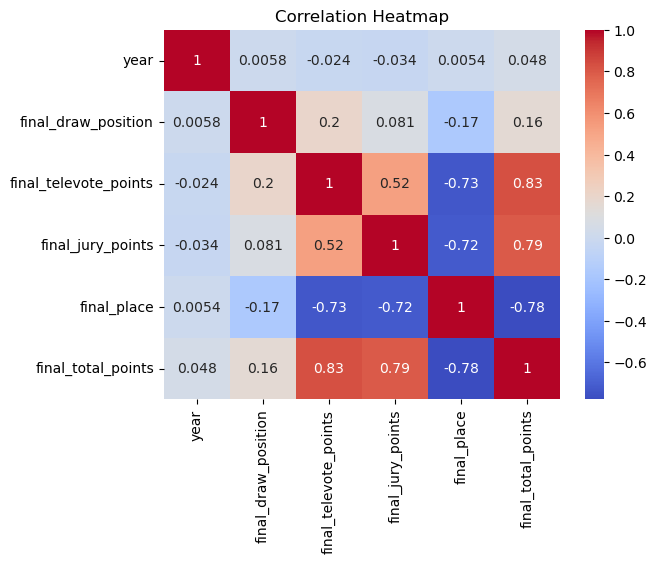

In [14]:
de.vs.correlation_heatmap(jury_televote_imputed)

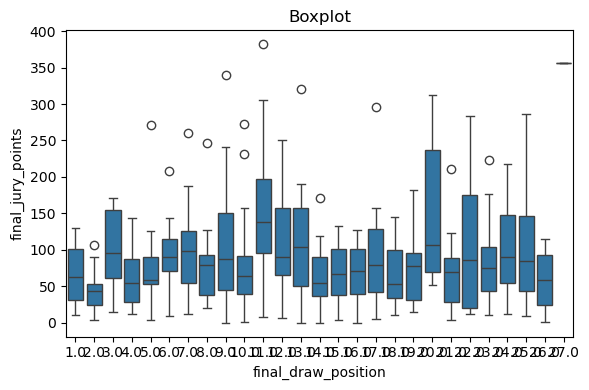

In [15]:
de.vs.boxplot(jury_televote_imputed, 'final_draw_position', 'final_jury_points')

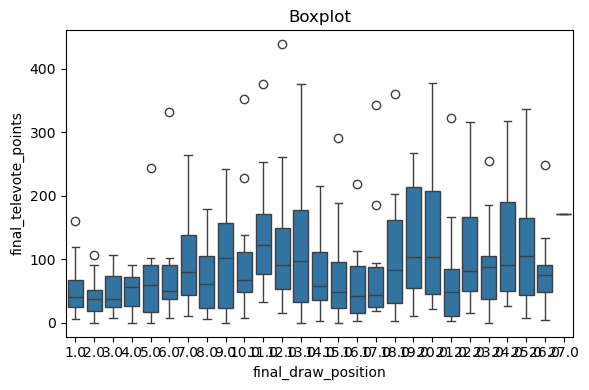

In [16]:
de.vs.boxplot(jury_televote_imputed, 'final_draw_position', 'final_televote_points')

<Figure size 600x400 with 0 Axes>

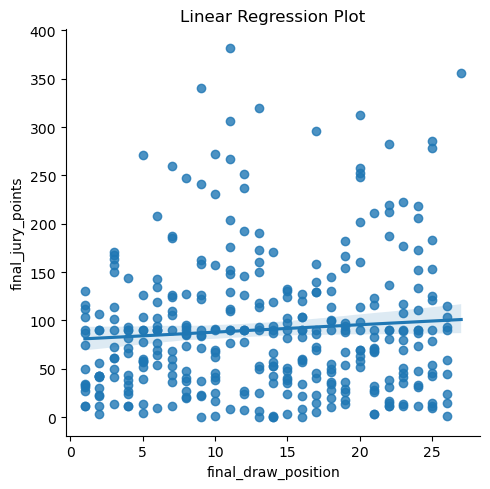

In [17]:
de.vs.lmplot(jury_televote_imputed, 'final_draw_position', 'final_jury_points')
# the smaller the final_place - the better

<Figure size 600x400 with 0 Axes>

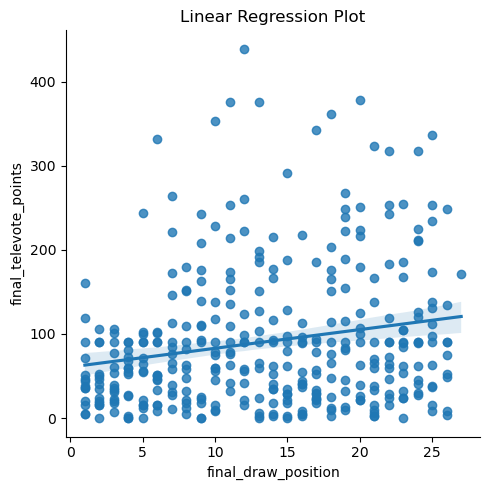

In [18]:
de.vs.lmplot(jury_televote_imputed, 'final_draw_position', 'final_televote_points')
# the smaller the final_place - the better

### Using normalization to refine data for machine learning

In [20]:
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = jury_televote_imputed.drop(columns=['final_jury_points', 'final_televote_points', 'final_place'])  # Features


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
y_jury = jury_televote_imputed['final_jury_points']
y_televote = jury_televote_imputed['final_televote_points']

#### Why I ended up not using PCA as I had intended

In [23]:
X_scaled_test = StandardScaler().fit_transform(X)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled_test)

# Creating DataFrame for PCA components
pcadf = pd.DataFrame(data = X_pca, columns = ['pc1', 'pc2', 'pc3'])

# Adding target variable (final_televote_points)
pcadf['final_televote_points'] = jury_televote['final_televote_points']

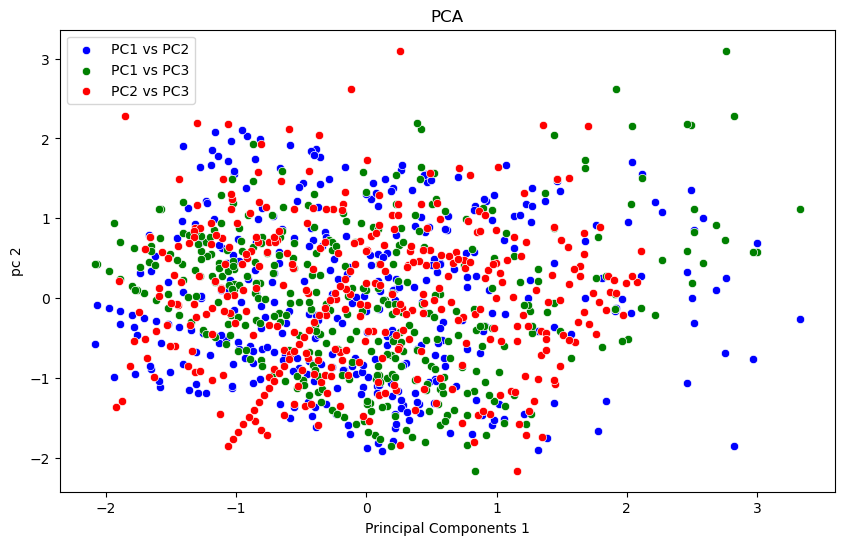

In [24]:
# Visualize the relationship between PCA components and the target variable (e.g., jury points)
plt.figure(figsize=(10, 6))
sbn.scatterplot(x=pcadf['pc1'], y=pcadf['pc2'], label='PC1 vs PC2', color='blue')
sbn.scatterplot(x=pcadf['pc1'], y=pcadf['pc3'], label='PC1 vs PC3', color='green')
sbn.scatterplot(x=pcadf['pc2'], y=pcadf['pc3'], label='PC2 vs PC3', color='red')
plt.title('PCA')
plt.xlabel('Principal Components 1')
plt.ylabel('pc 2')
plt.legend()
plt.show()

In [25]:
# Test without PCA (just StandardScaler)
y = jury_televote_imputed['final_televote_points']
X_scaled_test = StandardScaler().fit_transform(X)

# Train and evaluate model using only scaled features (without PCA)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train_t, y_train_t)

# Evaluate the model
y_pred = model.predict(X_test_t)
r2 = metrics.r2_score(y_test_t, y_pred)
print(f"R² without PCA: {r2}")

# Now test with PCA (StandardScaler + PCA)
X_scaled_test = StandardScaler().fit_transform(X)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled_test)

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model.fit(X_train_t, y_train_t)

# Evaluate the model
y_pred = model.predict(X_test_t)
r2_with_pca = metrics.r2_score(y_test_t, y_pred)
print(f"R² with PCA: {r2_with_pca}")


R² without PCA: 0.6229190368002047
R² with PCA: 0.6229190368002047


##### As the R-squared values always are the same with or without usage of PCA, I've decided to drop PCA, and instead only use normalization as that does the job of scaling the data to make it as comparable as possible in the final model

### Training and testing machine learning using normalization from earlier

In [28]:
from sklearn.linear_model import LinearRegression

X_jury_train, X_jury_test, y_jury_train, y_jury_test = train_test_split(X_scaled, y_jury)

jury_model = ml.train_linear_reg_model(X_jury_train, y_jury_train)

ml.evaluate_model(jury_model, X_jury_test, y_jury_test)


C:\Users\jejol\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'MAE': 35.7977767147047,
 'MSE': 2016.3608964513946,
 'RMSE': 44.90390736284978,
 'R2': 0.586370446920572,
 'predictions': array([ 65.84654543, 204.48824896, 131.63784144, 209.13199659,
         22.18690758,  68.71201139,  45.13247179,  53.83323797,
         53.80933535,  33.93081555,  83.08486735,  37.07179841,
        108.91346974,  57.87000348, 120.49705301, 141.32772977,
         29.99392485, 118.17812736, 217.46594012,  30.76186258,
         82.21051949, 233.01052972,  45.67310769,  66.8485333 ,
         80.39708531, 118.96975471, 284.35544924,  75.51253922,
         91.29525454,  74.68780927, 123.36251897,  62.77908311,
         43.17853995,  59.78148364, 138.13488226, 120.06957556,
         53.35817636,  56.99382679,  40.97192884,  73.93519702,
         77.70298095,  66.36061405, 118.86151574,  54.38651851,
         31.14583144,  55.12423938,  62.62304698,  84.74859582,
         62.68799036,  84.81824568,  61.60124015, 158.09324491,
         69.89617667,  97.13463033,  59.83539

In [29]:
X_televote_train, X_televote_test, y_televote_train, y_televote_test = train_test_split(X_scaled, y_televote)

televote_model = ml.train_linear_reg_model(X_televote_train, y_televote_train)

ml.evaluate_model(televote_model, X_televote_test, y_televote_test)

C:\Users\jejol\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


{'MAE': 34.52141028093733,
 'MSE': 1786.191045257691,
 'RMSE': 42.26335345494594,
 'R2': 0.752865686673288,
 'predictions': array([ 45.98118707,  92.15014139, 226.38771421, 120.43635316,
         22.03455141,  33.58316775,  75.75749596, 244.36940992,
         49.57354921,  25.51769103,  78.12328132,  66.85646263,
         32.83249729,  77.2821988 ,  98.79028107,  48.78123953,
         43.89731989,  85.50717848,  48.40504018,  15.28421476,
         27.77403322,  10.89360441, 102.5092687 , 120.06609234,
         13.62152211, 179.09264388,  37.36173073, 259.2605939 ,
         92.09628392,  43.29651631,  57.92763644, 113.1398242 ,
        111.70952307,  24.61703316,  16.76652457, 109.93144871,
        165.58493708,  27.56955507,  49.62803994,  23.08086588,
        187.44673111, 310.55277237, 160.57006112,  63.82662121,
         53.73274248,  39.85662363, 168.39981035, 110.01806311,
         81.62274935,  65.7267696 , 228.49949478, 119.56769842,
         69.65899713,  94.99095874, 126.40464

Mean Absolute Error (MAE) =  35.7977767147047
Mean Squared Error (MSE) =  2016.3608964513946
Root Mean Squared Error (RMSE) =  44.90390736284978
R2 (R-squared) score =  0.586370446920572
Explained variance score =  0.5867


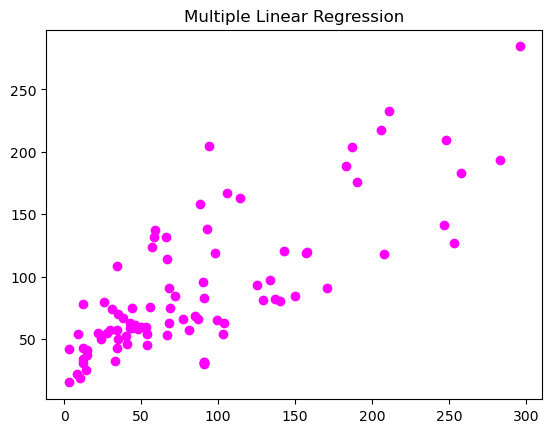

In [30]:
# JURY ERROR MARGIN
y_jury_predicted = jury_model.predict(X_jury_test)

print("Mean Absolute Error (MAE) = ", metrics.mean_absolute_error(y_jury_test, y_jury_predicted))

print("Mean Squared Error (MSE) = ", metrics.mean_squared_error(y_jury_test, y_jury_predicted))


# calculate RMSE using scikit-learn
print("Root Mean Squared Error (RMSE) = ", np.sqrt(metrics.mean_squared_error(y_jury_test, y_jury_predicted)))


# R-squared
r2_jury_score = metrics.r2_score(y_jury_test, y_jury_predicted)
print ("R2 (R-squared) score = ", r2_jury_score)
eV_jury = round(metrics.explained_variance_score(y_jury_test, y_jury_predicted), 4)
print('Explained variance score = ',eV_jury )

# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_jury_test, y_jury_predicted, color='magenta')
plt.show()


Mean Absolute Error (MAE) =  34.52141028093733
Mean Squared Error (MSE) =  1786.191045257691
Root Mean Squared Error (RMSE) =  42.26335345494594
R2 (R-squared) score =  0.752865686673288
Explained variance score =  0.7607


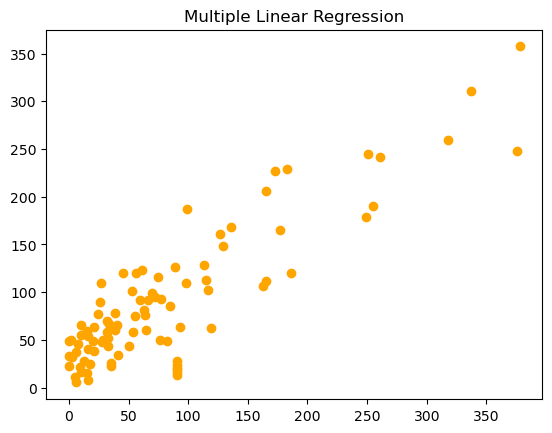

In [31]:
# TELEVOTE ERROR MARGIN
y_televote_predicted = televote_model.predict(X_televote_test)

print("Mean Absolute Error (MAE) = ", metrics.mean_absolute_error(y_televote_test, y_televote_predicted))

print("Mean Squared Error (MSE) = ", metrics.mean_squared_error(y_televote_test, y_televote_predicted))


# calculate RMSE using scikit-learn
print("Root Mean Squared Error (RMSE) = ", np.sqrt(metrics.mean_squared_error(y_televote_test, y_televote_predicted)))


# R-squared
r2_televote_score = metrics.r2_score(y_televote_test, y_televote_predicted)
print ("R2 (R-squared) score = ", r2_televote_score)
eV_televote = round(metrics.explained_variance_score(y_televote_test, y_televote_predicted), 4)
print('Explained variance score = ',eV_televote )

# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_televote_test, y_televote_predicted, color='orange')
plt.show()

In [32]:
print("Correlation between Performance Order and Jury Points:", jury_corr.loc['final_draw_position', 'final_jury_points'])
print("Correlation between Performance Order and Televote Points:", televote_corr.loc['final_draw_position', 'final_televote_points'])


Correlation between Performance Order and Jury Points: 0.0809795025256007
Correlation between Performance Order and Televote Points: 0.2000022464710925


In [33]:
#ml.save_model(jury_model, 'jury_running_order')

In [34]:
#ml.save_model(televote_model, 'televote_running_order')

In [35]:
y_televote_train.head()

136    21.000000
266    89.000000
345    40.000000
254    90.503067
357    38.000000
Name: final_televote_points, dtype: float64

In [36]:
y_televote_test.head()

141      8.0
106     66.0
337    173.0
81     186.0
25       9.0
Name: final_televote_points, dtype: float64

In [37]:
y_jury_train.head()

185    286.000000
200      4.000000
191     37.000000
231     90.490798
333     27.000000
Name: final_jury_points, dtype: float64

In [38]:
y_jury_test.head()

88      87.0
263     94.0
102     66.0
73     248.0
97       8.0
Name: final_jury_points, dtype: float64

##### From this analysis we can conclude that generally the televote favours songs with a later running order, while for jury it is only very slightly influenced towards a later running order. We can tell by the graph of their linear regressions, their correlation with final_draw_position having a negative coefficent - representing the higher amount of points you receive, the lower (better) your placing becomes.